In [2]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

In [3]:
# Read the input file
sampling_freq, audio = wavfile.read('BabyElephantWalk60.wav')

In [4]:
# Normalize the values. Normalization adjusts the gain by a constant value across the entire signal
audio = audio / (2**15)

In [5]:
# Extract length
len_audio = len(audio)

In [6]:
# Apply Fourier transform. Only the first half of the output bins represent usable frequency values
transformed_signal = np.fft.fft(audio)
# half_length = int((len_audio )/2.0)
transformed_signal = abs(transformed_signal[0:])
transformed_signal /= float(len_audio)
transformed_signal **= 2

In [7]:
# Extract length of transformed signal
len_ts = len(transformed_signal)

In [8]:
# Take care of even/odd cases
if len_audio % 2:
    transformed_signal[1:len_ts] *= 2
else:
    transformed_signal[1:len_ts-1] *= 2

In [9]:
# Extract power in dB
power = 10 * np.log10(transformed_signal)

In [10]:
# Build the time axis
x_values = np.arange(0, half_length, 1) * (sampling_freq / len_audio) / 1000


NameError: name 'half_length' is not defined

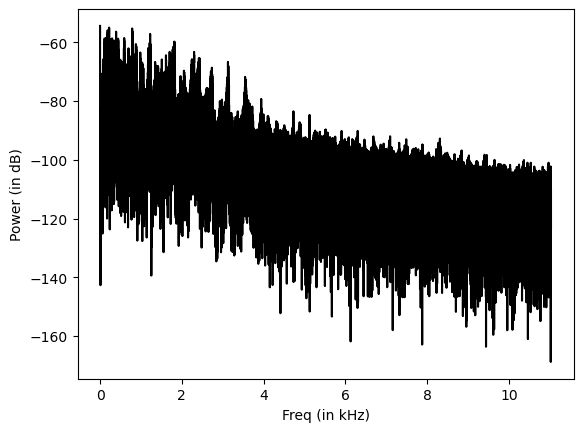

In [10]:
# Plot the figure
plt.figure()
plt.plot(x_values, power, color='black')
plt.xlabel('Freq (in kHz)')
plt.ylabel('Power (in dB)')
plt.show()